# Comunicate Data findings with Ford Bike data
## By Yash Viras

## Overview

In this project, I will perform an exploratory analysis of data provided by Ford GoBike, a bike-share system provider.Variables including, trip duration, start time and end time with date, start station and end station names, start and end coordinates, customer type, year of birth and gender.

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
%matplotlib inline

In [2]:
DF = pd.read_csv('fordgo.csv')

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131169 entries, 0 to 131168
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             131169 non-null  int64  
 1   start_time               131169 non-null  object 
 2   end_time                 131169 non-null  object 
 3   start_station_id         131169 non-null  int64  
 4   start_station_name       131169 non-null  object 
 5   start_station_latitude   131169 non-null  float64
 6   start_station_longitude  131169 non-null  float64
 7   end_station_id           131169 non-null  int64  
 8   end_station_name         131169 non-null  object 
 9   end_station_latitude     131169 non-null  float64
 10  end_station_longitude    131169 non-null  float64
 11  bike_id                  131169 non-null  int64  
 12  user_type                131169 non-null  object 
 13  member_birth_year        121791 non-null  float64
 14  memb

In [4]:
DF_cleaned = DF.copy()

In [5]:
DF_cleaned['member_age'] = 2019 - DF_cleaned['member_birth_year']

In [6]:
DF_cleaned['start_time'] = pd.to_datetime(DF_cleaned['start_time'])
DF_cleaned['end_time'] = pd.to_datetime(DF_cleaned['end_time'])

DF_cleaned['start_station_id'] = DF_cleaned['start_station_id'].astype('str')
DF_cleaned['end_station_id'] = DF_cleaned['end_station_id'].astype('str')
DF_cleaned['bike_id'] = DF_cleaned['bike_id'].astype('str')

DF_cleaned['user_type'] = DF_cleaned['user_type'].astype('category')
DF_cleaned['member_gender'] = DF_cleaned['member_gender'].astype('category')

DF_cleaned.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131169 entries, 0 to 131168
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             131169 non-null  int64         
 1   start_time               131169 non-null  datetime64[ns]
 2   end_time                 131169 non-null  datetime64[ns]
 3   start_station_id         131169 non-null  object        
 4   start_station_name       131169 non-null  object        
 5   start_station_latitude   131169 non-null  float64       
 6   start_station_longitude  131169 non-null  float64       
 7   end_station_id           131169 non-null  object        
 8   end_station_name         131169 non-null  object        
 9   end_station_latitude     131169 non-null  float64       
 10  end_station_longitude    131169 non-null  float64       
 11  bike_id                  131169 non-null  object        
 12  user_type       

In [7]:
DF_cleaned['start_time_month'] = DF_cleaned['start_time'].dt.strftime('%B')
DF_cleaned['start_time_month_num'] = DF_cleaned['start_time'].dt.month.astype(int)
DF_cleaned['start_time_weekday'] = DF_cleaned['start_time'].dt.strftime('%a')
DF_cleaned['start_time_hour'] = DF_cleaned['start_time'].dt.hour
DF_cleaned['end_time_hour'] = DF_cleaned['end_time'].dt.hour
DF_cleaned['duration_min'] = DF_cleaned['duration_sec']/60
DF_cleaned['duration_min'] = DF_cleaned['duration_min'].astype(int)

In [8]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131169 entries, 0 to 131168
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             131169 non-null  int64  
 1   start_time               131169 non-null  object 
 2   end_time                 131169 non-null  object 
 3   start_station_id         131169 non-null  int64  
 4   start_station_name       131169 non-null  object 
 5   start_station_latitude   131169 non-null  float64
 6   start_station_longitude  131169 non-null  float64
 7   end_station_id           131169 non-null  int64  
 8   end_station_name         131169 non-null  object 
 9   end_station_latitude     131169 non-null  float64
 10  end_station_longitude    131169 non-null  float64
 11  bike_id                  131169 non-null  int64  
 12  user_type                131169 non-null  object 
 13  member_birth_year        121791 non-null  float64
 14  memb

## Bike Ride Duration Time Visualization:

The origianl duration data has right skew issue - bike durations range from less than 1 minute to 1400+ minutes with median at around 9 min and mean at around 12 min. We have to do some data transformation to make data visualization and data interpretation easiler. Below are the plots before/after data transformation.

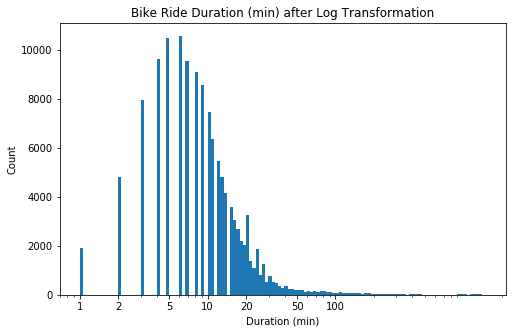

In [9]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(DF_cleaned['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = DF_cleaned, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.xlabel('Duration (min)');
plt.ylabel('Count');
plt.title("Bike Ride Duration (min) after Log Transformation");

## Daily/Weekly Bike Ride Trends and Biker Type Visualization:
> Features investigated include the following: Start Time Hour, Start Time DayofWeek, Member Gender, and User Type. 

Observations from below plots:
- Tuesday has the most male bikers compared to other days. It also has the most female bikers compared to other days.
- On 5:00 PM has the most male bikers compared to other hours. 8:00 AM and 5:00 PM have more female bikers compared to other hours.
- On 5:00 PM has the most 'Subscriber' bikers compared to other hours. It also has the most 'Customer' bikers compared to other hours.
- Tuesday has the most 'Subscriber' bikers compared to other days. Saturday has the most 'Customer' bikers compared to other days.
- Most 'Subscriber' are male. Most 'Customer' bikers are also male.

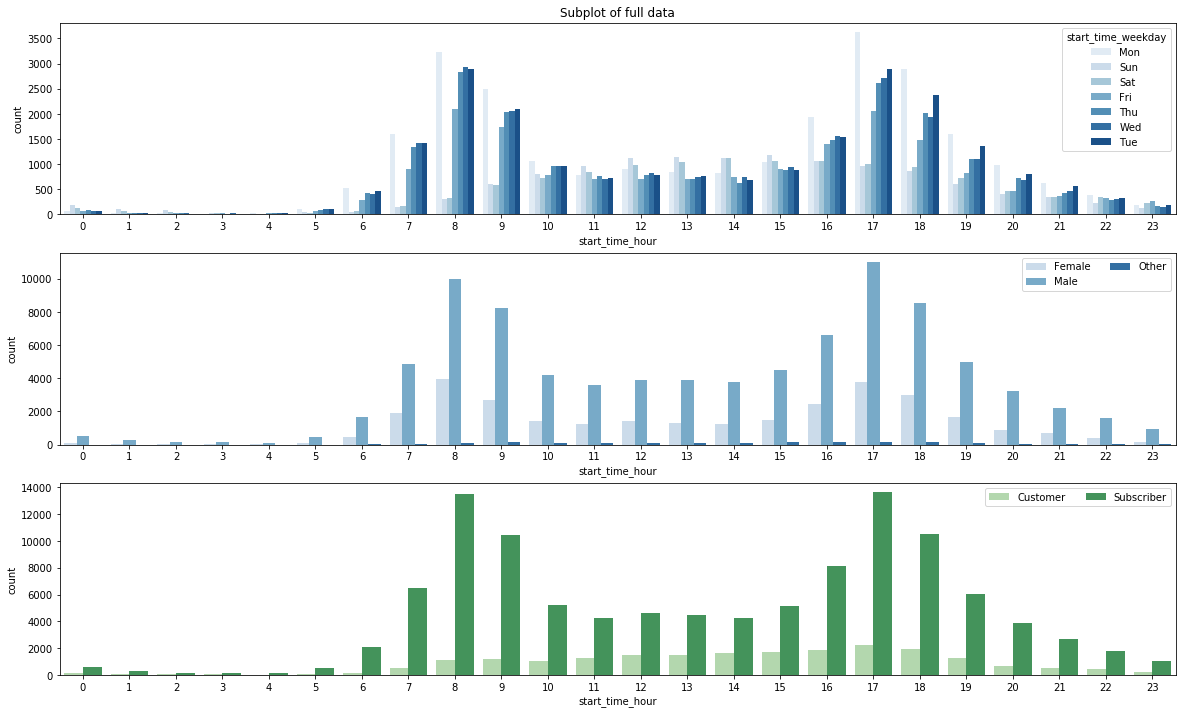

In [10]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [20, 12]);

plt.subplot(3, 1, 1);
plt.title("Subplot of full data");
sb.countplot(data = DF_cleaned, x = 'start_time_hour', hue = 'start_time_weekday', palette = 'Blues');

ax = plt.subplot(3, 1, 2);
sb.countplot(data = DF_cleaned, x = 'start_time_hour', hue = 'member_gender', palette = 'Blues');
ax.legend(ncol = 2); # re-arrange legend to reduce overlapping


ax = plt.subplot(3, 1, 3);
sb.countplot(data = DF_cleaned, x = 'start_time_hour', hue = 'user_type', palette = 'Greens');
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping


## Bike Ride Durations for Different Age Group Across DayofWeek and Hour Visulization:

In [11]:
DF_cleaned.member_age.describe()

count    121791.000000
mean         36.919099
std          10.497088
min          19.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         119.000000
Name: member_age, dtype: float64

In [12]:
age_flag1 = (DF_cleaned['member_age'] < 40)
age_below_forty = DF_cleaned.loc[age_flag1,:]

age_flag2 = (DF_cleaned['member_age'] >= 40)
age_above_forty = DF_cleaned.loc[age_flag2,:]

In [13]:
customer = DF_cleaned.query('user_type == "Customer"')['bike_id'].count()
subscriber = DF_cleaned.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / DF_cleaned['bike_id'].count()
subscriber_prop = subscriber / DF_cleaned['bike_id'].count()

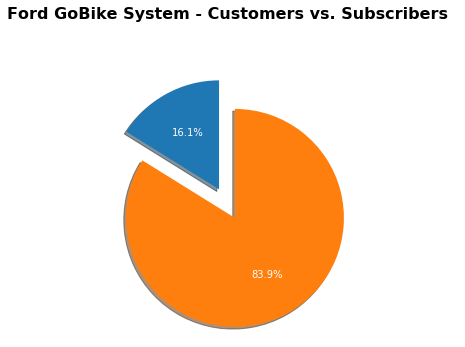

In [14]:
plt.figure(figsize = [8, 5])

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})
plt.axis('equal')

plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

From whole dataset 88.4% are subscribers and only 11.6% are customers.

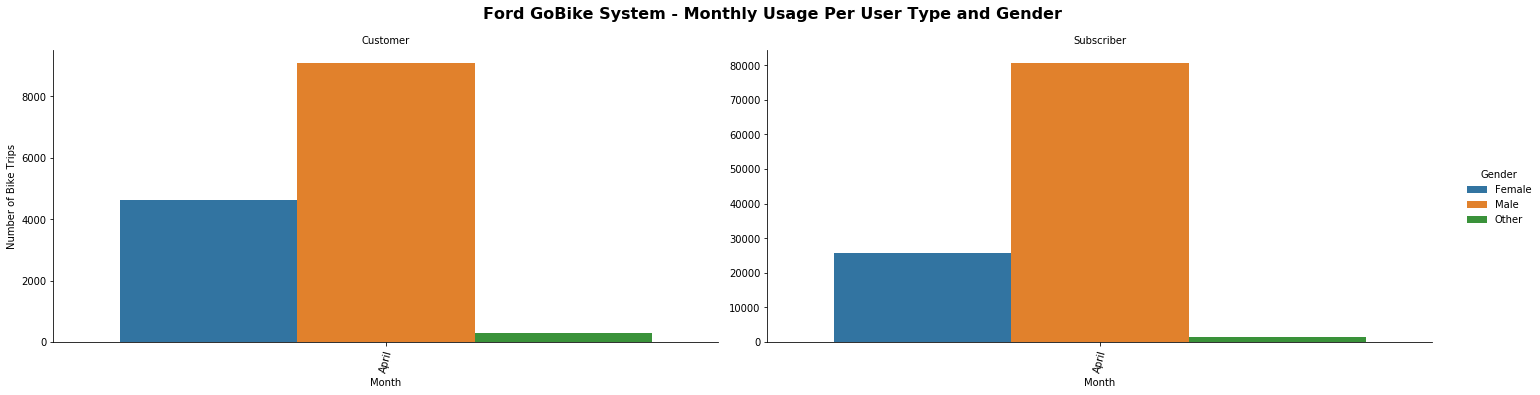

In [15]:
graph = sb.catplot(data=DF_cleaned, x='start_time_month', col="user_type", hue="member_gender", kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("Month", "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle('Ford GoBike System - Monthly Usage Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

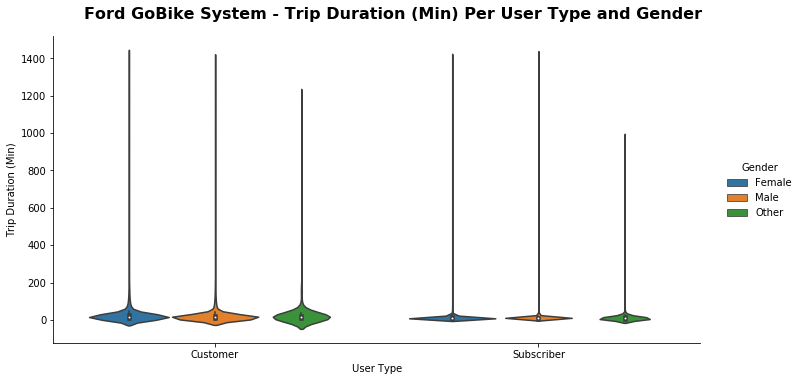

In [16]:
graph = sb.catplot(data=DF_cleaned, x='user_type', y="duration_min", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Ford GoBike System - Trip Duration (Min) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

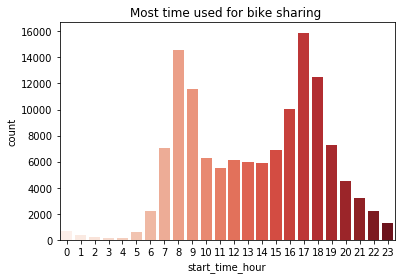

In [17]:
sb.countplot(data = DF_cleaned, palette="Reds", x = 'start_time_hour');
plt.title("Most time used for bike sharing ");